In [10]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs 
plt.rcdefaults()
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-dark-palette')

In [11]:
from linear_solver_v2 import solve_mat_eqn
from mat_multiply import m_multiply

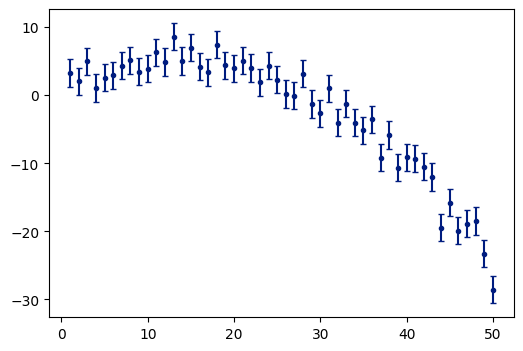

In [54]:
data = np.loadtxt('data2')
x = data[:,0]
y = data[:,1]
sigma = data[:,2]
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=sigma , fmt= '.' , capsize = 2)
plt.show()

In [56]:
def poly(x,a):
    val = sum([a[j]*(x**(j)) for j in range(1,len(a))])
    return val

In [57]:
def fit(x,y,sigma,order):
    A = []
    for i in range(len(x)):
        temp = [(x[i]**j)/(sigma[i]) for j in range(order)]
        A.append(temp)
    A = np.asarray(A)
    #print(A.shape)
    b = np.asarray([y_i/sigma_i for y_i,sigma_i in zip(y,sigma)])
    b = np.reshape(b,(len(b),1))

    alpha = m_multiply(A.T , A)
    beta = m_multiply(A.T ,b)
    var_params = [alpha[i][i] for i in range(len(alpha))]
    params = solve_mat_eqn(alpha ,beta)
    cov_mat = np.linalg.inv(alpha)
    return params , cov_mat

In [58]:
def cal_chi(y,y_mod,sigma):
    y_mod = poly(x , params)
    residuals = y_mod - y
    chi_sq_arr = [((y[i]-y_mod[i])**2)/(sigma[i]**2) for i in range(len(y))]
    chi_sq = sum(chi_sq_arr)
    print('Chi sq = ' , chi_sq)
    dof = len(y)-len(params)
    red_chi_sq = chi_sq/dof
    print(red_chi_sq) 


In [67]:
params , cov = fit(x,y,sigma,3)
p_err = [(cov[i][i])**0.5 for i in range(len(cov))]
print(params)
print(p_err)
y_mod = poly(x , params)
residuals = y_mod - y
chi_sq_arr = [((y[i]-y_mod[i])**2)/(sigma[i]**2) for i in range(len(y))]
chi_sq = sum(chi_sq_arr)
print('Chi sq = ' , chi_sq)
dof = len(y)-len(params)
red_chi_sq = chi_sq/dof
print('Degree of freedom' , dof)
print('reduced chi sq:' , red_chi_sq) 

[0.9642597346938723, 0.6458451858435689, -0.023147599270477437]
[0.883638119668119, 0.07993036492849703, 0.0015194129636125582]
Chi sq =  50.59054594562271
Degree of freedom 47
reduced chi sq: 1.0763945945877171


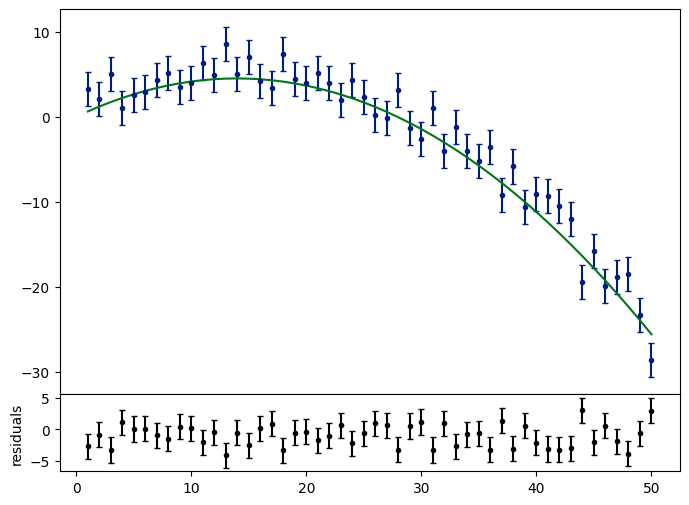

In [68]:

fig = plt.figure(figsize=(8,6) , constrained_layout=True)
spec = gs.GridSpec(nrows=2, ncols = 1 , height_ratios=[1,0.2] , hspace=0)
ax = fig.add_subplot(spec[0,0])
ax.errorbar(x,y,yerr=sigma , fmt= '.' , capsize = 2)
ax.plot(x,y_mod)

#plt.style.use('bmh')
res_plot = fig.add_subplot(spec[1,0],sharex=ax)
res_plot.errorbar(x,residuals , yerr=sigma , fmt='.' , color='k' , capsize = 2)
res_plot.set_ylabel('residuals')
plt.show()
#print(y_mod)